In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [33]:
pd.set_option('display.max_columns', 50)

adidas_final_df = pd.read_csv('../data_preprocessing/adidas_final_df.csv')
adidas_final_df

,id,brand,model,product_name,condition,last_sale,last_sale_size,lowest_ask,highest_bid,since_last_sale_dollar,since_last_sale_percent,colorway,retail_price,release_date,high_52_week,low_52_week,low_12_month_trade,high_12_month_trade,volatility,num_sales_12_month,price_premium_12_month,avg_sale_price_12_month,period
0,adidas-rs-replicant-ozweego-raf-simons-colonia...,adidas,rs,adidas rs replicant ozweego raf simons colonia...,New,21100.0,7.5,24300.0,16700.0,-15800.0,-43.0,Core Black/Colonial Blue/Core Black,57585.0,2018-03-15,36900.0,8500.0,15300.0,26900.0,27.7,21.0,-63.6,19300.0,948.0
1,adidas-eqt-running-guidance-solebox,adidas,eqt,adidas eqt running guidance solebox,New,18700.0,9,20600.0,16700.0,-3400.0,-16.0,NaN,14134.5,2014-12-06,23200.0,18700.0,16800.0,20600.0,10.0,4.0,31.1,20900.0,2143.0
2,adidas-ultra-boost-reigning-champ-grey,adidas,ultra,adidas ultra boost 3.0 reigning champ grey,New,21100.0,12,20600.0,19400.0,600.0,3.0,NaN,20940.0,2017-04-07,35100.0,17900.0,16500.0,25800.0,21.8,51.0,NaN,22900.0,1290.0
3,adidas-adistar-comp-a-d,adidas,adistar,adidas adistar comp a/d,New,3300.0,10.5,4800.0,3100.0,-300.0,-9.0,NaN,16752.0,2017-09-21,7000.0,3300.0,1600.0,5000.0,50.4,3.0,-80.6,4700.0,1123.0
4,adidas-ultra-boost-20-core-black-night-metallic,adidas,ultra,adidas ultra boost 20 core black night metallic,New,10700.0,7.5,9300.0,10000.0,400.0,3.0,Core Black/Night Metallic/Cloud White,18846.0,2019-12-06,19000.0,5300.0,10200.0,11200.0,5.2,749.0,-43.9,11000.0,317.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,adidas-sobakov-clear-orange-core-black,adidas,sobakov,adidas sobakov clear orange core black,New,5300.0,8,5700.0,6300.0,1000.0,23.0,Clear Orange/Core Black/Crystal White,12564.0,2018-10-04,8500.0,2700.0,3600.0,7000.0,32.6,66.0,-58.3,5400.0,745.0
3848,adidas-deerupt-cloud-white-core-black,adidas,deerupt,adidas deerupt cloud white core black,New,10600.0,10,10600.0,10500.0,200.0,1.0,Cloud White/Cloud White/Core Black,10470.0,2018-07-05,16200.0,4800.0,8900.0,12300.0,15.7,55.0,NaN,8600.0,836.0
3849,adidas-ultra-boost-light-bone-2-0,adidas,ultra,adidas ultra boost 2.0 clear onix,New,23200.0,11,19500.0,16800.0,4300.0,22.0,NaN,18846.0,2016-10-19,29600.0,13200.0,18700.0,27800.0,19.5,12.0,22.2,19800.0,1460.0
3850,adidas-predator-precision-turf-blue-white-red,adidas,predator,adidas predator precision turf blue white red,New,49500.0,11,NaN,21000.0,23100.0,87.0,NaN,18846.0,2017-09-01,49500.0,26500.0,39700.0,59400.0,19.9,3.0,160.8,35900.0,1143.0


### model
モデルの数を多い順に表示

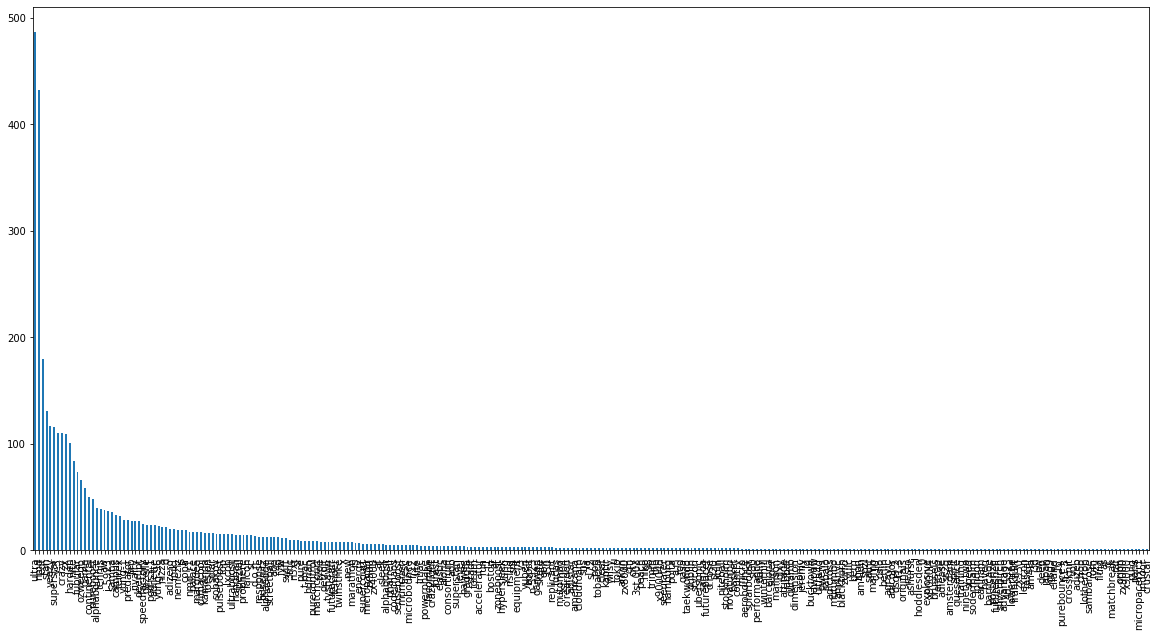

In [34]:
plt.figure(figsize=(20, 10))
adidas_final_df['model'].value_counts().plot.bar()

見にくいので多い順に20個取り出す

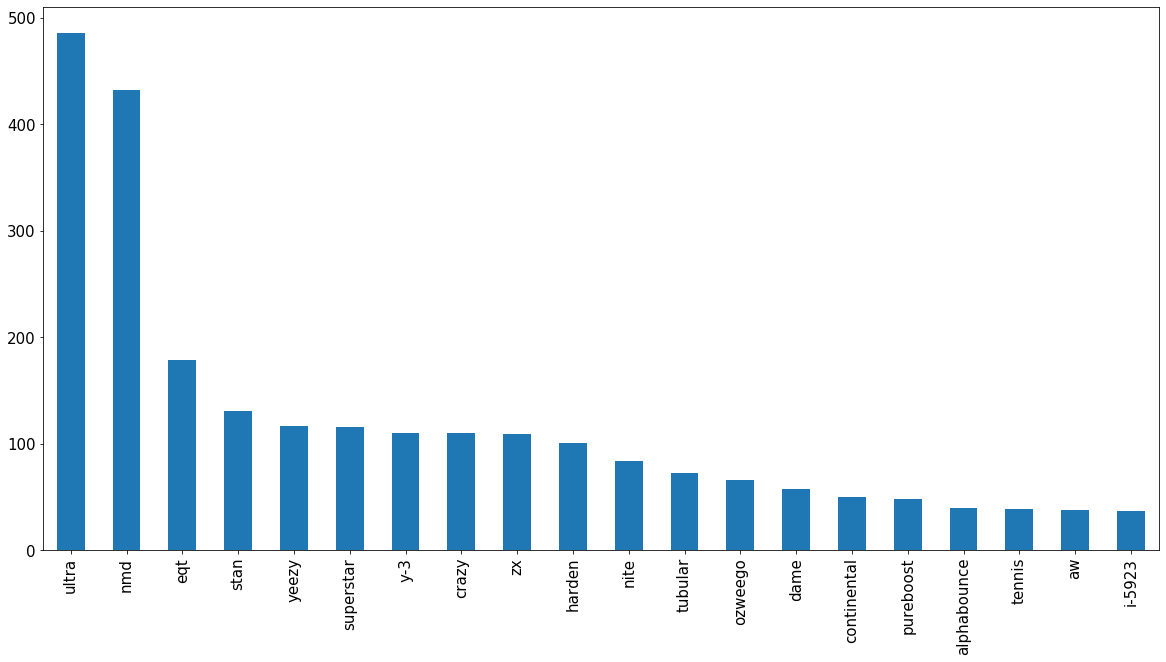

In [35]:
plt.figure(figsize=(20, 10))
plt.rcParams['font.size'] = 15
adidas_final_df['model'].value_counts().head(20).plot.bar()

ultraとnmdが突出して多くの種類のスニーカーを出しているモデルであることが分かる。ultraとnmdはカラーバリエーションが多く、他のデザイナーやブランドとのコラボレーションも頻繁に行っているためと考えられる。

これら20個のモデルごとに各特徴量の平均値を見てみる

In [36]:
df = adidas_final_df.groupby('model').mean().loc[['ultra', 'nmd', 'eqt', 'stan', 'superstar', 
                                                  'yeezy', 'zx', 'crazy', 'y-3', 'harden', 'nite', 
                                                  'tubular', 'ozweego', 'dame', 'continental', 'pureboost', 
                                                  'alphabounce', 'tennis', 'aw', 'i-5923']]
df

,last_sale,lowest_ask,highest_bid,since_last_sale_dollar,since_last_sale_percent,retail_price,high_52_week,low_52_week,low_12_month_trade,high_12_month_trade,volatility,num_sales_12_month,price_premium_12_month,avg_sale_price_12_month,period
model,,,,,,,,,,,,,,,
ultra,16689.094650,18213.135593,16102.489627,367.283951,10.563786,19870.595062,28179.012346,9697.736626,12895.267490,20481.481481,25.796406,229.960905,-16.919958,16733.127572,885.309955
nmd,16794.212963,15659.764706,15083.449883,304.166667,7.342593,17119.904167,27575.231481,9501.851852,12691.435185,20899.537037,26.238771,149.682870,-4.013507,16403.935185,986.448931
eqt,11152.513966,11786.708861,8856.774194,216.201117,13.782123,15234.142458,15254.189944,7529.608939,8777.653631,13525.139665,24.607947,21.357542,-24.869663,10714.525140,1219.588235
stan,12721.374046,13647.457627,10258.474576,127.480916,7.755725,14617.238931,17970.992366,9005.343511,9945.038168,15503.053435,28.302655,27.618321,-9.915873,12667.175573,1086.752475
superstar,14252.586207,15209.345794,12281.000000,-90.517241,7.517241,14301.478448,23709.482759,10471.551724,11197.413793,17304.310345,29.184694,65.284483,6.121739,14560.344828,994.392523
yeezy,51369.230769,43921.367521,59185.470085,2004.273504,4.675214,25239.858974,100495.726496,28267.826087,43101.709402,59644.444444,16.315517,7169.726496,106.466379,47419.658120,655.215517
zx,14853.211009,15319.811321,13276.699029,-165.137615,5.899083,16006.612844,27177.064220,9902.752294,11398.165138,18310.091743,29.652577,106.605505,-2.684906,15767.889908,718.877551
crazy,13720.000000,18905.000000,11160.194175,-92.727273,9.100000,17061.340909,19308.181818,8794.545455,10665.454545,16775.454545,25.116162,32.918182,-13.045455,13166.363636,1164.147059
y-3,22934.545455,25826.530612,15763.461538,-782.727273,-0.081818,38534.359091,29895.454545,16676.363636,18410.909091,27461.818182,25.865909,11.072727,-41.041121,22561.818182,821.220183


定価の平均が高いモデルを高い順に20個表示

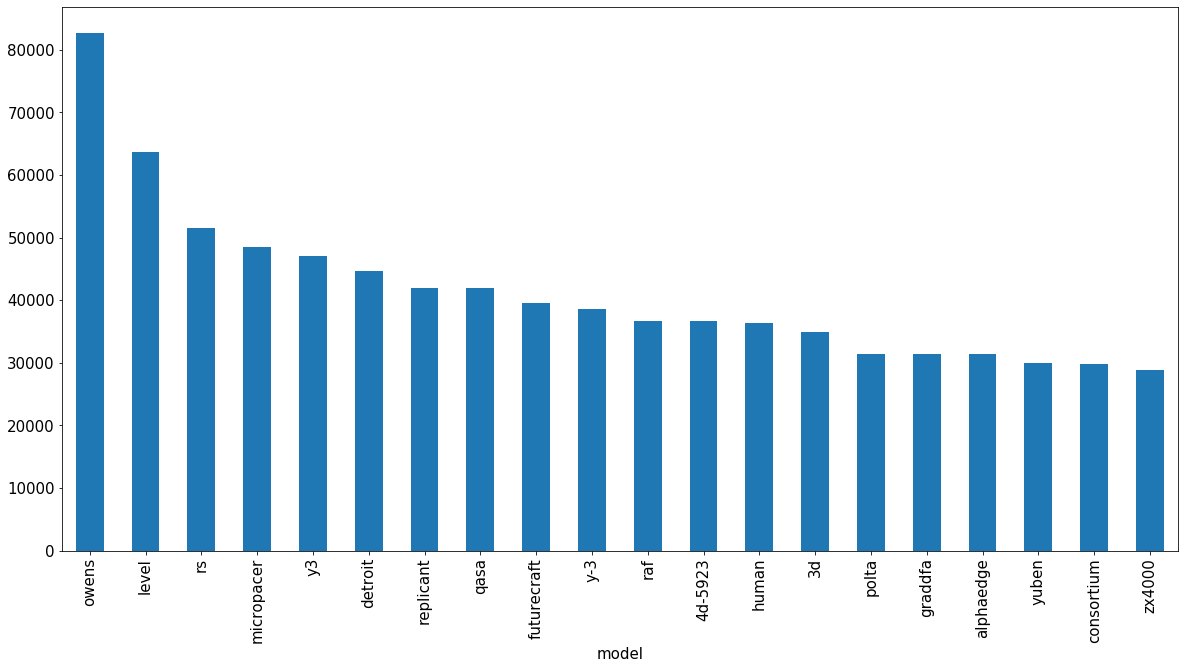

In [37]:
df2 = adidas_final_df.groupby('model').mean()

plt.figure(figsize=(20, 10))
df3 = df2.sort_values('retail_price', ascending=False)
df3['retail_price'].head(20).plot.bar()

転売価格の上昇率の平均が高いモデルを高い順に20個表示

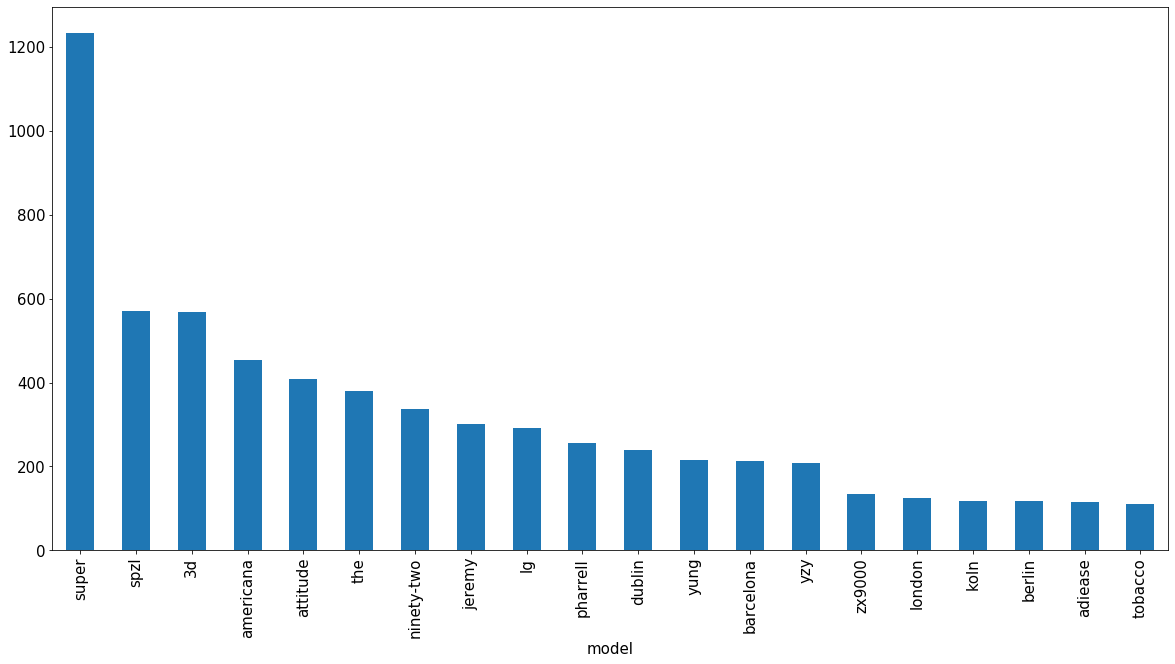

In [38]:
plt.figure(figsize=(20, 10))
df3 = df2.sort_values('price_premium_12_month', ascending=False)
df3['price_premium_12_month'].head(20).plot.bar()

突出して高いsuperを確認

In [39]:
adidas_final_df[adidas_final_df['model'] == 'super']

,id,brand,model,product_name,condition,last_sale,last_sale_size,lowest_ask,highest_bid,since_last_sale_dollar,since_last_sale_percent,colorway,retail_price,release_date,high_52_week,low_52_week,low_12_month_trade,high_12_month_trade,volatility,num_sales_12_month,price_premium_12_month,avg_sale_price_12_month,period
190,adidas-super-ape-star-bape,adidas,super,adidas super ape star bape,New,210800.0,12.5,189800.0,60600.0,127800.0,154.0,NaN,15705.0,2003-12-21,210800.0,83100.0,147000.0,274700.0,30.3,2.0,1233.3,147000.0,6146.0


bathing apeというブランドとのコラボレーションモデルのスニーカーだった。2003年に1.5万円で販売されたものが直近では21万で落札されている。

### release_date

In [41]:
#発売された年月でまとめる
adidas_final_df['release_date'] = pd.to_datetime(adidas_final_df['release_date'], format='%Y/%m/%d')
adidas_final_df['year_month'] = adidas_final_df['release_date'].dt.strftime('%Y%m')
release_months = adidas_final_df.groupby(['year_month'], as_index=False).count()
release_months.rename(columns={'id':'count'}, inplace=True)
release_months = release_months[['year_month', 'count']]
release_months

,year_month,count
0,200001,1
1,200101,1
2,200312,1
3,200601,2
4,200602,1
...,...,...
109,202006,54
110,202007,36
111,202008,53
112,202009,63


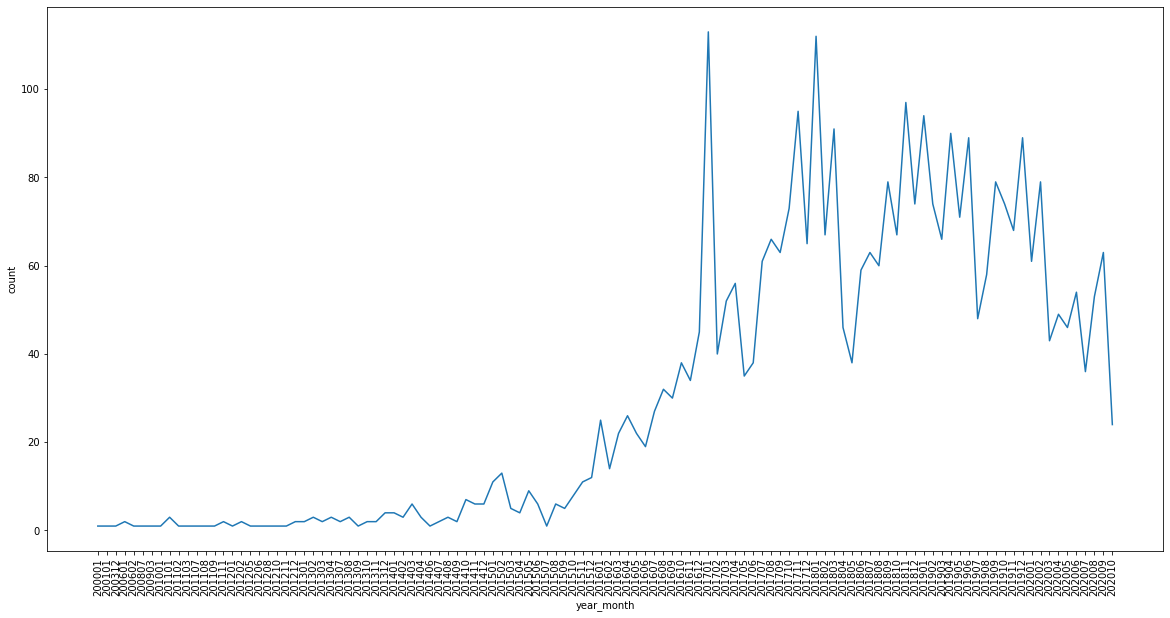

In [44]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='year_month', y='count', data=release_months)
xlabels = release_months.year_month
ax.set_xticklabels(xlabels, rotation=90)
plt.show()

In [46]:
#発売された年でまとめる

adidas_final_df['year'] = adidas_final_df['release_date'].dt.strftime('%Y')
release_year = adidas_final_df.groupby(['year'], as_index=False).count()
release_year.rename(columns={'id':'count'}, inplace=True)
release_year = release_year[['year', 'count']]
release_year

,year,count
0,2000,1
1,2001,1
2,2003,1
3,2006,3
4,2008,1
5,2009,1
6,2010,1
7,2011,10
8,2012,10
9,2013,24


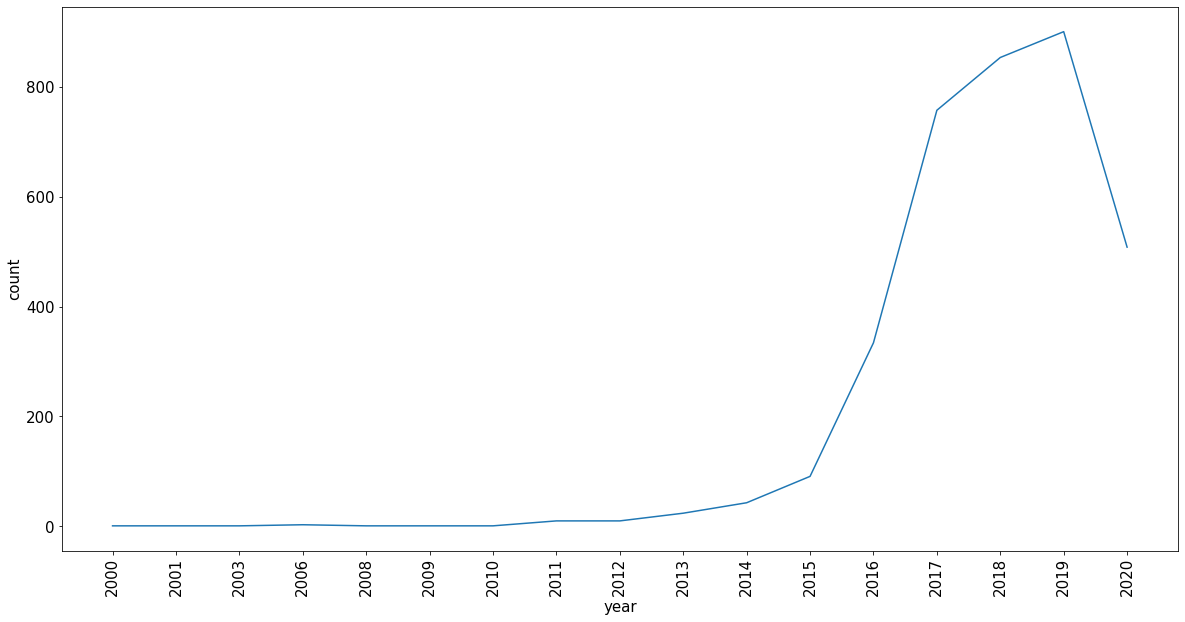

In [50]:
plt.figure(figsize=(20, 10))
plt.rcParams['font.size'] = 15
ax = sns.lineplot(x='year', y='count', data=release_year)
xlabels = release_year.year
ax.set_xticklabels(xlabels, rotation=90)
plt.show()

スクレイピングは10月16-18日に行ったので、10月以降に発売された商品の中には転売市場に回っていないものもある。それらと11月,12月以降に発売される商品を含めると2020年発売の商品数は前年を超えるかもしれない。

### price_premium

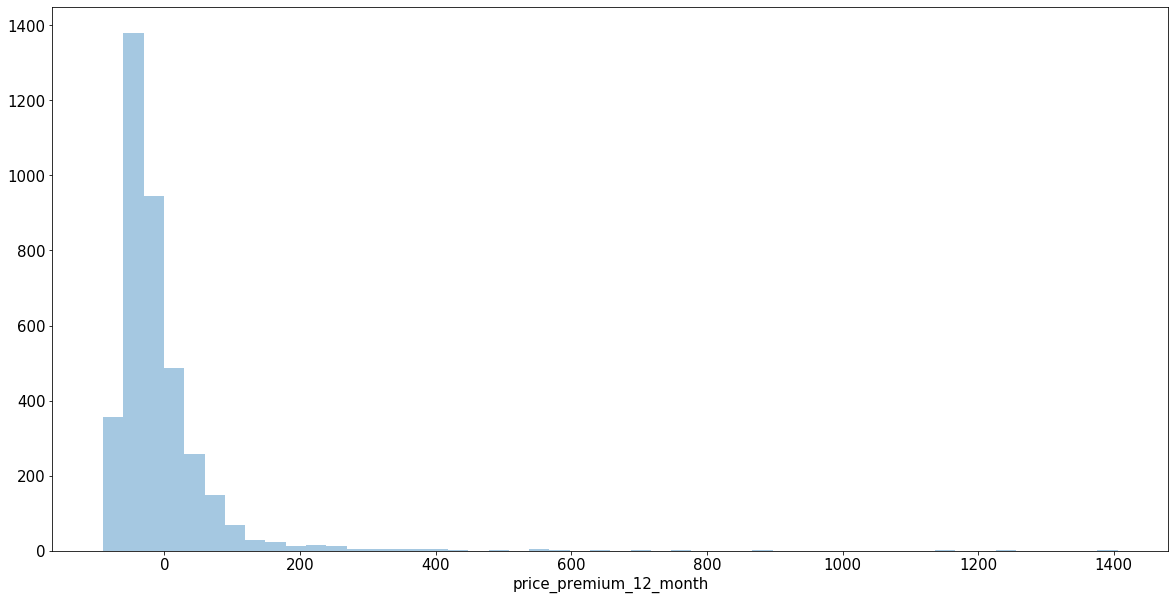

In [51]:
plt.figure(figsize=(20, 10))
plt.rcParams['font.size'] = 15
sns.distplot(adidas_final_df['price_premium_12_month'], kde=False)

商品の中に突出してプレ値がついているものがあるので、右の裾がかなり伸びている。

In [52]:
item_less_than0 = adidas_final_df[(adidas_final_df['price_premium_12_month'] < 0) ]

item_0 = adidas_final_df[(adidas_final_df['price_premium_12_month'] == 0) ]

item_0_100 = adidas_final_df[(adidas_final_df['price_premium_12_month'] > 0) 
                                  & (adidas_final_df['price_premium_12_month'] < 100)]

item_100_200 = adidas_final_df[(adidas_final_df['price_premium_12_month'] >= 100) 
                                  & (adidas_final_df['price_premium_12_month'] < 200)]

item_200_300 = adidas_final_df[(adidas_final_df['price_premium_12_month'] >= 200) 
                                  & (adidas_final_df['price_premium_12_month'] < 300)]

item_300_400 = adidas_final_df[(adidas_final_df['price_premium_12_month'] >= 300) 
                                  & (adidas_final_df['price_premium_12_month'] < 400)]

item_400_500 = adidas_final_df[(adidas_final_df['price_premium_12_month'] >= 400) 
                                  & (adidas_final_df['price_premium_12_month'] < 500)]

item_500_600 = adidas_final_df[(adidas_final_df['price_premium_12_month'] >= 500) 
                                  & (adidas_final_df['price_premium_12_month'] < 600)]

item_600or_more = adidas_final_df[(adidas_final_df['price_premium_12_month'] >= 600) ]


print('0未満: {}個'.format(len(item_less_than0)))
print('0: {}個'.format(len(item_0)))
print('0より大きく100未満: {}個'.format(len(item_0_100)))
print('100以上200未満: {}個'.format(len(item_100_200)))
print('200以上300未満: {}個'.format(len(item_200_300)))
print('300以上400未満: {}個'.format(len(item_300_400)))
print('400以上500未満: {}個'.format(len(item_400_500)))
print('500以上600未満: {}個'.format(len(item_500_600)))
print('600以上: {}個'.format(len(item_600or_more)))

0未満: 2694個
0: 0個
0より大きく100未満: 907個
100以上200未満: 103個
200以上300未満: 34個
300以上400未満: 12個
400以上500未満: 5個
500以上600未満: 6個
600以上: 7個


price_premium >= 200を抜いてヒストグラムを描写

3704


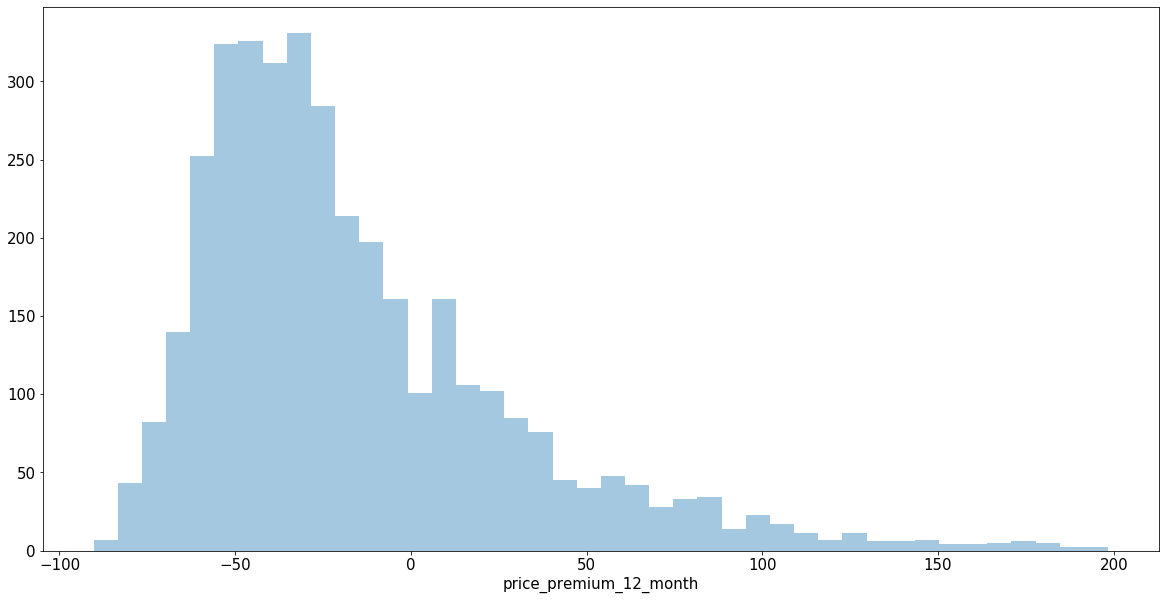

In [56]:
items = adidas_final_df[adidas_final_df['price_premium_12_month'] < 200]

plt.figure(figsize=(20, 10))
sns.distplot(items['price_premium_12_month'], kde=False)

print(len(items))

-30あたりを中心に右に裾が広がっている分布になっていることが分かる。

### 利潤(avg_sale_price_12_month - retail_price) を見てみる

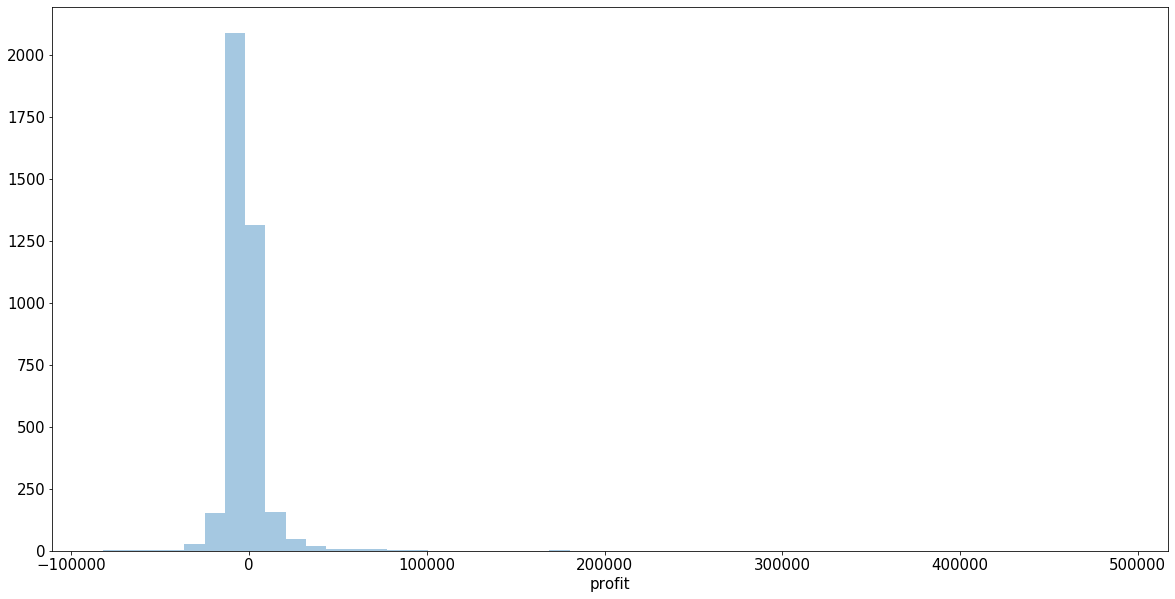

In [59]:
adidas_final_df['profit'] = adidas_final_df['avg_sale_price_12_month'] - adidas_final_df['retail_price']
plt.figure(figsize=(20, 10))
sns.distplot(adidas_final_df['profit'], kde=False)

In [71]:
item0 = adidas_final_df[(adidas_final_df['profit'] < -10000)]

item1 = adidas_final_df[(adidas_final_df['profit'] >= -10000) 
                                  & (adidas_final_df['profit'] < -5000)]

item2 = adidas_final_df[(adidas_final_df['profit'] >= -5000) 
                                  & (adidas_final_df['profit'] < -1000)]

item3 = adidas_final_df[(adidas_final_df['profit'] >= -1000) 
                                  & (adidas_final_df['profit'] < 1000)]

item4 = adidas_final_df[(adidas_final_df['profit'] >= 1000) 
                                  & (adidas_final_df['profit'] < 5000)]

item5 = adidas_final_df[(adidas_final_df['profit'] >= 5000) 
                                  & (adidas_final_df['profit'] < 10000)]

item6 = adidas_final_df[(adidas_final_df['profit'] >= 10000) 
                                  & (adidas_final_df['profit'] < 15000)]

item7 = adidas_final_df[(adidas_final_df['profit'] >= 15000) 
                                  & (adidas_final_df['profit'] < 20000)]

item8 = adidas_final_df[(adidas_final_df['profit'] >= 20000) 
                                  & (adidas_final_df['profit'] < 30000)]

item9 = adidas_final_df[(adidas_final_df['profit'] >= 30000)]


print('-10000未満: {}個'.format(len(item0)))
print('-10000以上-5000未満: {}個'.format(len(item1)))
print('-5000以上-1000未満: {}個'.format(len(item2)))
print('-1000以上1000未満: {}個'.format(len(item3)))
print('1000以上5000未満: {}個'.format(len(item4)))
print('5000以上10000未満: {}個'.format(len(item5)))
print('10000以上15000未満: {}個'.format(len(item6)))
print('15000以上20000未満: {}個'.format(len(item7)))
print('20000以上30000未満: {}個'.format(len(item8)))
print('30000以上: {}個'.format(len(item9)))

-10000未満: 472個
-10000以上-5000未満: 1019個
-5000以上-1000未満: 1099個
-1000以上1000未満: 359個
1000以上5000未満: 429個
5000以上10000未満: 232個
10000以上15000未満: 86個
15000以上20000未満: 48個
20000以上30000未満: 42個
30000以上: 66個


-40000 < profit < 40000でヒストグラムを描写

3801


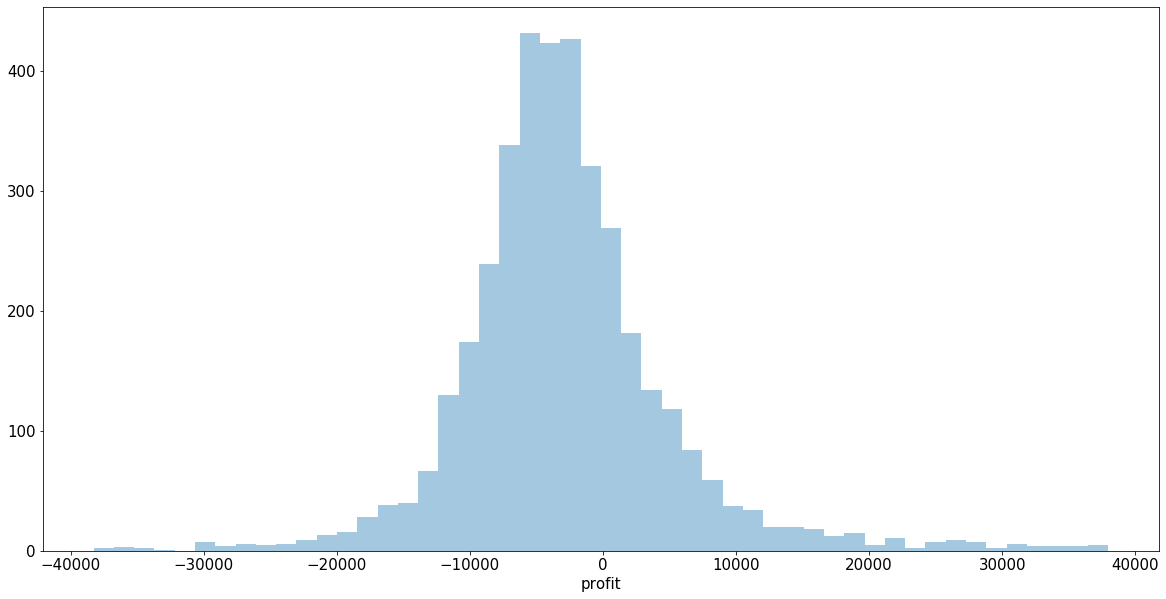

In [67]:
items = adidas_final_df[(adidas_final_df['profit'] > -40000) & 
                        (adidas_final_df['profit'] < 40000)]
plt.figure(figsize=(20, 10))
sns.distplot(items['profit'], kde=False)

print(len(items))

-4000あたりを中心にした正規分布

In [68]:
adidas_final_df[adidas_final_df['profit'] < -40000]

,id,brand,model,product_name,condition,last_sale,last_sale_size,lowest_ask,highest_bid,since_last_sale_dollar,since_last_sale_percent,colorway,retail_price,release_date,high_52_week,low_52_week,low_12_month_trade,high_12_month_trade,volatility,num_sales_12_month,price_premium_12_month,avg_sale_price_12_month,period,year_month,year,profit
213,rick-owens-tech-runner-white-leather,adidas,owens,rick owens tech runner white leather,New,31800.0,10.5,105300.0,31600.0,0.0,0.0,NaN,82713.0,2016-03-06,31800.0,31800.0,28600.0,34900.0,NaN,1.0,-61.9,31800.0,1687.0,201603,2016,-50913.0
794,adidas-micropacer-hender-scheme-silver,adidas,micropacer,adidas micropacer hender scheme silver,New,19100.0,9,19900.0,12800.0,-1400.0,-7.0,Silver/Silver/Blue,99465.0,2018-03-16,20500.0,15000.0,16900.0,21200.0,11.3,4.0,-81.0,17800.0,947.0,201803,2018,-81665.0
1693,adidas-nmd-r1-hender-scheme-black,adidas,nmd,adidas nmd r1 hender scheme black,New,42200.0,10,73800.0,31600.0,21100.0,100.0,Black/Red/Blue,104700.0,2018-03-16,89600.0,15000.0,18400.0,66000.0,56.5,7.0,-60.0,41600.0,947.0,201803,2018,-63100.0
1841,adidas-micropacer-hender-scheme,adidas,micropacer,adidas micropacer hender scheme,New,21900.0,8,21800.0,23100.0,9200.0,73.0,NaN,99465.0,2017-09-02,21900.0,12700.0,17300.0,26500.0,21.0,2.0,-78.2,17300.0,1142.0,201709,2017,-82165.0
2394,adidas-nmd-hender-scheme,adidas,nmd,adidas nmd r1 hender scheme,New,31700.0,10,63200.0,31700.0,4400.0,16.0,NaN,104700.0,2017-09-02,40700.0,26400.0,27100.0,36200.0,14.3,9.0,-70.0,32600.0,1142.0,201709,2017,-72100.0
2734,adidas-level-runner-low-rick-owens-milk,adidas,level,adidas level runner low rick owens milk,New,19000.0,8.5,29000.0,17700.0,-10400.0,-35.0,NaN,87948.0,2017-03-01,29500.0,19000.0,13900.0,24300.0,27.5,2.0,-78.6,24300.0,1327.0,201703,2017,-63648.0
3444,adidas-superstar-hender-scheme,adidas,superstar,adidas superstar hender scheme,New,26600.0,8,43600.0,26500.0,-18300.0,-41.0,NaN,94230.0,2017-09-02,52700.0,26300.0,15400.0,37800.0,42.0,5.0,-72.0,39800.0,1142.0,201709,2017,-54430.0
3529,adidas-rs-replicant-ozweego-raf-simons-scarlet...,adidas,rs,adidas rs replicant ozweego raf simons scarlet...,New,36900.0,10.5,17300.0,10400.0,19800.0,115.0,Scarlet/Dust Rust/Scarlet,57585.0,2018-03-15,36900.0,8500.0,28700.0,45200.0,22.3,13.0,-36.4,16800.0,948.0,201803,2018,-40785.0


hender schemeとrick owensのコラボレーションモデルは2次流通では価値は大きく下がるらしい。定価が高い分下がり幅も極端に大きい。